In [1]:
#| default_exp GP_regression

In [2]:
#| hide
from nbdev.showdoc import *
import nbdev
from nbdev import nbdev_export

In [16]:
%matplotlib widget

In [3]:
#| export
from ITS_LIVE_TOOL import datacube_tools, interactive, obj_setup, dataset_inspection

In [17]:
#| export
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, ExpSineSquared, RationalQuadratic, RBF


In [5]:
#| hide 

import pickle
with open('/uufs/chpc.utah.edu/common/home/u1269862/2023_fall/ITS_LIVE_TOOL/example_data/point_coords','rb') as fp:
    point_coords = pickle.load(fp)
          

In [6]:
#| hide 

point_coords = point_coords[0]

In [7]:
#| hide 

glacier = obj_setup.Glacier('Baltoro','RGI60-14.06794','EPSG:32643','manual')

In [43]:
glacier.name

'Baltoro Glacier'

In [8]:
#| hide 

glacier_pt = obj_setup.Glacier_Point('Baltoro', 'example_point', glacier.rgi_id, point_coords)

original xy [76.36013929649597, 35.73912785079385] 4326 maps to datacube (622992.2829075075, 3955867.335135076) EPSG:32643
original xy [76.36013929649597, 35.73912785079385] 4326 maps to datacube (622992.2829075075, 3955867.335135076) EPSG:32643
subset and load at  56.22 seconds
14452


In [10]:
sample_point_ls = [glacier_pt.point_latlon]

In [12]:
#| hide 

ds_full = glacier_pt.cube_around_point

In [13]:
ds_full

<xarray.Dataset>
Dimensions:                (time_numeric: 9299, x: 3, y: 3)
Coordinates:
    mid_date               (time_numeric) datetime64[ns] 1989-11-09T04:53:39....
  * x                      (x) float64 6.229e+05 6.23e+05 6.231e+05
  * y                      (y) float64 3.956e+06 3.956e+06 3.956e+06
    img_separation         (time_numeric) float64 16.0 16.0 112.0 ... 15.0 5.0
  * time_numeric           (time_numeric) float64 1.99e+03 ... 2.023e+03
    obs_id                 (time_numeric) int64 0 2 3 4 ... 14449 14450 14451
    mapping                int64 0
Data variables:
    v                      (time_numeric, y, x) float32 nan nan ... 46.0 46.0
    vy                     (time_numeric, y, x) float32 nan nan ... 0.0 0.0
    vx                     (time_numeric, y, x) float32 nan nan ... -46.0 -46.0
    v_error                (time_numeric, y, x) float32 nan nan ... 80.0 80.0
    satellite_img1         (time_numeric) <U2 '5' '5' '5' '5' ... '1A' '2B' '2B'
    satellite_img2         (time_numeric) <U2 '5' '5' '5' '5' ... '1A' '2A' '2A'
    acquisition_date_img1  (time_numeric) datetime64[ns] 1989-11-01T04:53:56....
    acquisition_date_img2  (time_numeric) datetime64[ns] 1989-11-17T04:53:20....
    img1_numeric           (time_numeric) float64 1.99e+03 ... 2.023e+03
    img2_numeric           (time_numeric) float64 1.99e+03 ... 2.023e+03
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               25-Sep-2023 21:40:31
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2/N30E070/ITS_L...
    skipped_granules:           s3://its-live-data/datacubes/v2/N30E070/ITS_L...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

## Data filtering

In [14]:
ds_sub = dataset_inspection.trim_by_baseline(ds_full)

In [15]:
ds_sub

<xarray.Dataset>
Dimensions:                (time_numeric: 6578, y: 3, x: 3)
Coordinates:
    mid_date               (time_numeric) datetime64[ns] 1990-06-21T04:51:31....
  * x                      (x) float64 6.229e+05 6.23e+05 6.231e+05
  * y                      (y) float64 3.956e+06 3.956e+06 3.956e+06
    img_separation         (time_numeric) float64 432.0 416.0 ... 81.0 76.0
  * time_numeric           (time_numeric) float64 1.99e+03 ... 2.023e+03
    obs_id                 (time_numeric) int64 8 9 12 17 ... 14394 14401 14411
    mapping                int64 0
Data variables:
    v                      (time_numeric, y, x) float32 86.0 81.0 ... 55.0 51.0
    vy                     (time_numeric, y, x) float32 8.0 12.0 ... -15.0 -9.0
    vx                     (time_numeric, y, x) float32 -85.0 -80.0 ... -50.0
    v_error                (time_numeric, y, x) float32 6.0 6.0 ... 14.0 13.0
    satellite_img1         (time_numeric) object '5' '5' '5' ... '2A' '2A' '2B'
    satellite_img2         (time_numeric) object '5' '5' '5' ... '2B' '2A' '2A'
    acquisition_date_img1  (time_numeric) datetime64[ns] 1989-11-17T04:53:20....
    acquisition_date_img2  (time_numeric) datetime64[ns] 1991-01-23T04:49:41....
    img1_numeric           (time_numeric) float64 1.99e+03 ... 2.023e+03
    img2_numeric           (time_numeric) float64 1.991e+03 ... 2.023e+03
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               25-Sep-2023 21:40:31
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2/N30E070/ITS_L...
    skipped_granules:           s3://its-live-data/datacubes/v2/N30E070/ITS_L...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

### Convert to `pd.DataFrames`

In [19]:
df = ds_full[['v','v_error','img1_numeric','img2_numeric']].to_dataframe().reset_index()
df_sub = ds_sub[['v','v_error','img1_numeric','img2_numeric']].to_dataframe().reset_index()

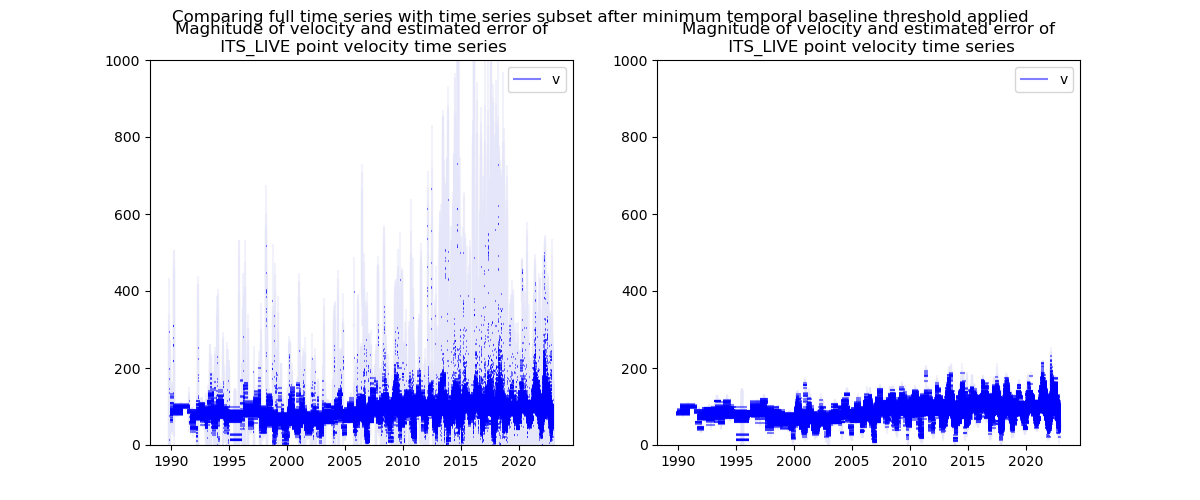

In [27]:
#| hide 

fig, (ax,ax1) = plt.subplots(ncols=2, figsize=(12,5))
ax1.errorbar(y=df_sub['v'], yerr = df_sub['v_error'], x = df_sub['time_numeric'], color='lavender', linestyle='None', alpha=0.5)
ax1.hlines(xmin = df_sub['img1_numeric'], xmax = df_sub['img2_numeric'],y = df_sub['v'], color='blue', label='v',alpha=0.5)
ax1.legend()
ax1.set_title('Magnitude of velocity and estimated error of\n ITS_LIVE point velocity time series');
ax.set_ylim(0,1000)
ax1.set_ylim(0,1000)
ax.errorbar(y=df['v'], yerr = df['v_error'], x = df['time_numeric'], color='lavender', linestyle='None', alpha=0.5)
ax.hlines(xmin = df['img1_numeric'], xmax = df['img2_numeric'],y = df['v'], color='blue', label='v',alpha=0.5)
ax.legend()
ax.set_title('Magnitude of velocity and estimated error of\n ITS_LIVE point velocity time series')
fig.suptitle('Comparing full time series with time series subset after minimum temporal baseline threshold applied');

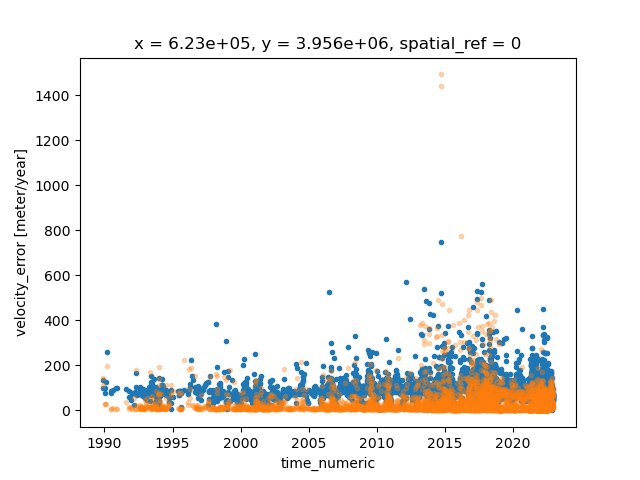

In [29]:
#| hide 

fig, ax = plt.subplots()
glacier_point.datacube_point.v.plot(ax=ax, linestyle='None', marker='o', markersize=3);
glacier_point.datacube_point.v_error.plot(ax=ax, linestyle='None', marker='o', alpha = 0.3, markersize=3);

This was just for one pixel. `Glacier_Point` also contains a 3x3 pixel cube surrounding the specified point to account for potential outlier estimates.

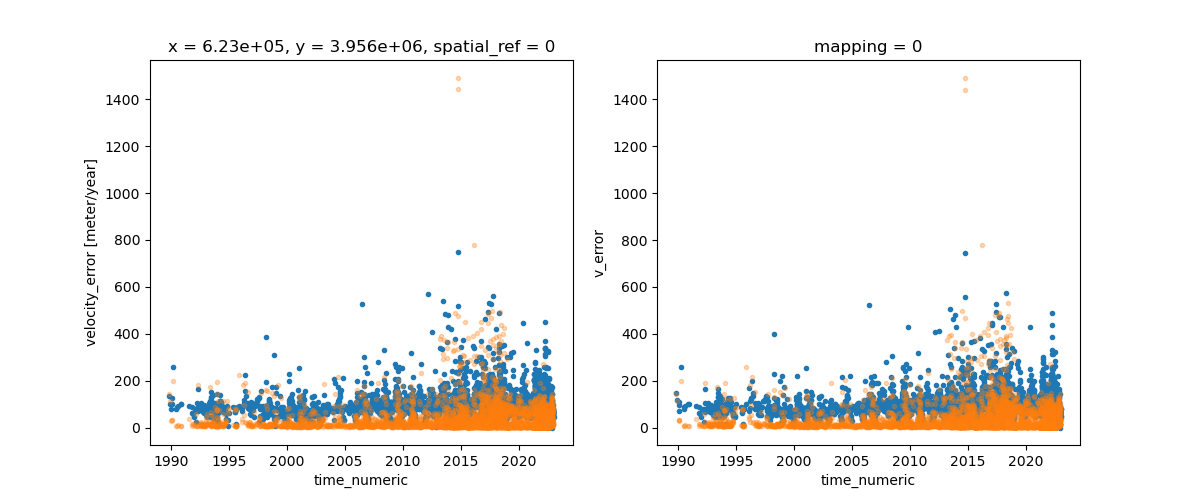

In [30]:
#| hide 

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
glacier_point.cube_around_point.v.median(dim=['x','y']).plot(ax=axs[1], linestyle='None', marker='o', markersize=3);
glacier_point.cube_around_point.v_error.median(dim=['x','y']).plot(ax=axs[1], linestyle='None', marker='o', alpha = 0.3, markersize=3);

glacier_point.datacube_point.v.plot(ax=axs[0], linestyle='None', marker='o', markersize=3);
glacier_point.datacube_point.v_error.plot(ax=axs[0], linestyle='None', marker='o', alpha = 0.3, markersize=3);

This comparison shows us that the trends we see in the single pixel plot are not too different from the pixels surrounding it. Good to know! 

Taking a look at this time series, we can see that there is interesting variability but also a fair amount of noise. This is where the regression methods become useful. 

Now we'll look at setting up the Gaussian Process model.
```{note}
add in some theory /background about GP and links to more thorough descriptions
```

In [37]:
#| hide

point_ls = [glacier_pt]

In [38]:
#| export
def prepare_ds(point_obj):

    '''note: i think this should be in its own notebook because its a different procss/step
       keeping here for now just to get an example going
       '''
    ds = point_obj.cube_around_point
    ds_sub = dataset_inspection.trim_by_baseline(ds_full)

    return ds, ds_sub

In [39]:
#| export
from sklearn.preprocessing import MinMaxScaler
import torch

class ModelInputs():
    '''this is a class to store model inputs for GP Regression. it is intended to store data for an individual temporal baseline category.
    '''
    def __init__(self, label, df, col, cutoffs):

        self.label = label
        self.df = df
        self.col = col
        self.cutoffs = cutoffs
        self.df_subset = self._filter_baselines()
        self.t_train, self.y_train, self.t_test, self.noise, self.scaled_y_train = self._organize_training_data()

    def _filter_baselines(self):
        df = self.df
        cutoffs = self.cutoffs
        df = df.dropna(subset=self.col)
        df_sub = df.loc[(df['img_separation'] >= cutoffs[0]) & (df['img_separation'] < cutoffs[1])]
        return df_sub

    def _organize_training_data(self):

        scaler = MinMaxScaler()
    
        t_train_np = self.df_subset.time_numeric.values
        y_train_np = self.df_subset[self.col].values
        model = scaler.fit(y_train_np.reshape(-1,1))
        scaled_y_train_np = model.transform(y_train_np.reshape(-1,1)).ravel()
    
        t_train_tensor = torch.Tensor(t_train_np)
        y_train_tensor = torch.Tensor(y_train_np)
        scaled_y_train_tensor = torch.Tensor(scaled_y_train_np)
    
        t_test_np = np.linspace(t_train_np.min(), t_train_np.max(), len(t_train_np))
        t_test_tensor = torch.Tensor(t_test_np)

        noise_tensor = torch.Tensor(self.df_subset['spatial_median_v_err'].values)
    
        
        return t_train_tensor, y_train_tensor, t_test_tensor, noise_tensor, scaled_y_train_tensor

In [40]:
#| export
def point_to_model_input(point_ls_obj, tb_category):

    point_ds, point_ds_sub = prepare_ds(point_ls_obj)

    #point_ds_sub = swap_time_dim(point_ds_sub)
    ds_new = point_ds_sub
    #ds_new = swap_time_dim(point_ds_sub)
    ds_new['spatial_median_v'] = (('time_numeric'), ds_new.v.median(dim=['x','y']).data)
    ds_new['spatial_median_v_err'] = (('time_numeric'), ds_new.v_error.median(dim=['x','y']).data)
    df = ds_new[['mid_date','spatial_median_v','time_numeric','img_separation','spatial_median_v_err']].to_dataframe().reset_index().dropna(subset='spatial_median_v')

    mod_input = ModelInputs(point_ls_obj.label, df, 'spatial_median_v', tb_category)

    return mod_input

In [41]:
#| export 
class SKLearnModelPreds():
    def __init__(self, inputs, kernel):
        self.inputs = inputs
        self.kernel = kernel
        #self.priors = priors
        self.t_train = self.inputs.t_train.numpy().reshape(-1,1)
        self.y_train = self.inputs.y_train.numpy().reshape(-1,1)
        self.t_test = self.inputs.t_test.numpy().reshape(-1,1)
        self.gp = GaussianProcessRegressor(kernel=kernel, normalize_y=True, optimizer='fmin_l_bfgs_b')
        self.y_pred, self.sigma, self.rmse = self.run_model()

    def run_model(self):

        self.gp.fit(self.t_train, self.y_train)
        y_pred, sigma = self.gp.predict(self.t_test, return_std=True)
        rmse = np.sqrt(((y_pred - self.y_train)**2).mean())
        return y_pred, sigma, rmse

In [42]:
#| export
mod_input_ls = []

for j in range(len(point_ls)):
    
    mod_input = point_to_model_input(point_ls[j], [0,600]) #
    mod_input_ls.append(mod_input)

In [46]:
point_to_model_input(point_ls[0], [0,600]).

In [47]:
#| export
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel, ExpSineSquared, RBF
from sklearn.model_selection import GridSearchCV

kernel = ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) + Matern(length_scale=1.5, length_scale_bounds=(0.0, 10.0), nu = 1.5) + ExpSineSquared(length_scale=1, periodicity=1, length_scale_bounds = (0,10), periodicity_bounds=(1e-3, 10.0)) + WhiteKernel(noise_level=2., noise_level_bounds = (1e-6,1e3))

mod_output_ls = []
for i in range(len(point_ls)):
    mod_output = SKLearnModelPreds(mod_input_ls[i], kernel)
    mod_output_ls.append(mod_output)

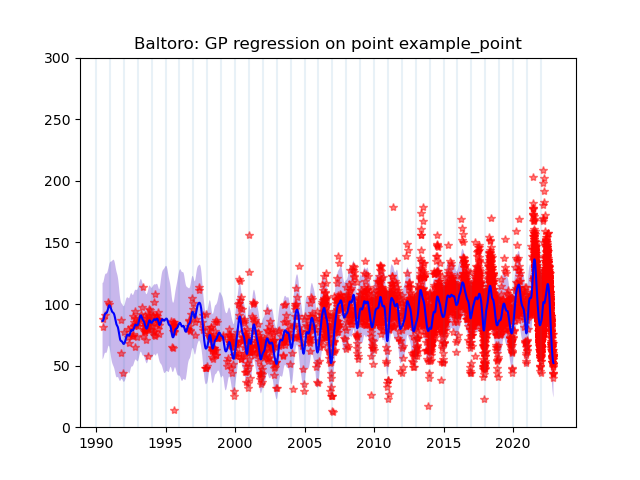

In [48]:
#| hide
fig, ax = plt.subplots()

ax.plot(mod_output_ls[0].t_train, mod_output_ls[0].y_train, 'r*', alpha = 0.5)
ax.plot(mod_output_ls[0].t_test, mod_output_ls[0].y_pred, c='blue')
ax.fill_between(mod_output_ls[0].t_test.ravel(),
                          mod_output_ls[0].y_pred + 1.96 * mod_output_ls[0].sigma,
                          mod_output_ls[0].y_pred - 1.96 * mod_output_ls[0].sigma,
                          facecolor='mediumpurple',alpha = 0.5)
x_ls = np.arange(1990, 2023, 1)
    

ax.set_ylim(0,300)
ax.set_title(f'Baltoro: GP regression on point {point_ls[0].label}')
    #axd[ax].legend(loc='upper center', ncols=3, bbox_to_anchor=(0.95, 1.05))
for x in x_ls:
    ax.axvline(x = x, alpha=0.1);
    

```{note}
still to add: model log marginal likelihood, rmse
```

In [28]:
# somewhere in this notebook a time sereis plot with horizontal bars corresponidng to temporal baseline should be added to convey different types of ice movement meaersurements?